In [36]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

https://vfdev-5-albumentations.readthedocs.io/en/docs_pytorch_fix/api/augmentations.html

In [37]:
def visualize(image):
    plt.figure(figsize=(3,3))
#     plt.axes('off')
    plt.imshow(image)

Read the image from the disk and convert it from the BGR color space to the RGB color space

For historical reasons, OpenCV reads an image in BGR format (so color channels of the image have the following order: Blue, Green, Red).<br>
Albumentations uses the most common and popular RGB image format.<br> So when using OpenCV, we need to convert the image format to RGB explicitly.

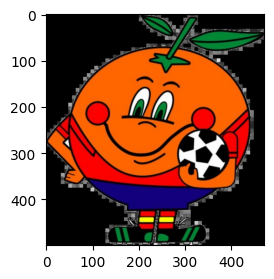

In [38]:
image=cv2.imread('/Users/joohyunyoon/Desktop/Naranjito.jpg')
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

visualize(image)

## HorizontalFlip

albumentations.augmentations.transforms.HorizontalFlip(always_apply=False, p=0.5)<BR>

∙Flip the input horizontally around the y-axis.<BR>
    
∙Parameters<BR>
-p (float) – probability of applying the transform. Default: 0.5.<BR>

∙Targets:image, mask, bboxes

In [39]:
transform=A.HorizontalFlip()
transform

HorizontalFlip(always_apply=False, p=0.5)

In [40]:
#transform(image=image)

In [41]:
augmented_image=transform(image=image)['image'] #but where image parameter suddenly pop up?

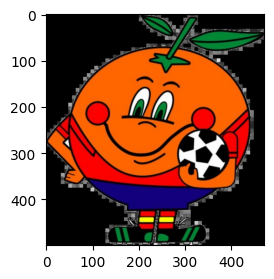

In [42]:
visualize(augmented_image)

## ShiftScaleRotate

albumentations.augmentations.transforms.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=45, interpolation=1, border_mode=4, always_apply=False, p=0.5)<BR>
    
∙Randomly apply affine transforms: translate, scale and rotate the input.<BR>

∙Parameters:	<BR>
-shift_limit ((float, float) or float) – shift factor range for both height and width. <BR>If shift_limit is a single float value, the range will be (-shift_limit, shift_limit). <BR>Absolute values for lower and upper bounds should lie in range [0, 1]. <BR>Default: 0.0625.<BR>
    
-scale_limit ((float, float) or float) – scaling factor range. <BR>If scale_limit is a single float value, the range will be (-scale_limit, scale_limit). <BR>Default: 0.1.<BR>
    
-rotate_limit ((int, int) or int) – rotation range. <BR>If rotate_limit is a single int value, the range will be (-rotate_limit, rotate_limit). <BR>Default: 45.<BR>
    
-interpolation (OpenCV flag) – flag that is used to specify the interpolation algorithm. Should be one of: cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA, cv2.INTER_LANCZOS4. Default: cv2.INTER_LINEAR.<BR>
    
-border_mode (OpenCV flag) – flag that is used to specify the pixel extrapolation method. Should be one of: cv2.BORDER_CONSTANT, cv2.BORDER_REPLICATE, cv2.BORDER_REFLECT, cv2.BORDER_WRAP, cv2.BORDER_REFLECT_101. Default: cv2.BORDER_REFLECT_101<BR>
    
-p (float) – probability of applying the transform. Default: 0.5.<BR>

∙Targets:image, mask

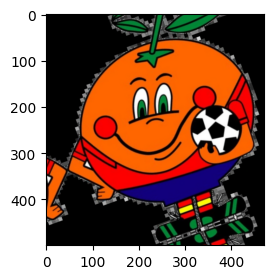

In [43]:
transform=A.ShiftScaleRotate()
augmented_image=transform(image=image)['image']
visualize(augmented_image)

## CLAHE

albumentations.augmentations.transforms.CLAHE(clip_limit=4.0, tile_grid_size=(8, 8), always_apply=False, p=0.5)

∙Apply Contrast Limited Adaptive Histogram Equalization to the input image.<br>

∙Parameters

-clip_limit (float) – upper threshold value for contrast limiting.
Default: 4.0. <br>
-tile_grid_size ((int, int)): size of grid for histogram equalization. Default: (8, 8).<br>
-p (float) – probability of applying the transform. Default: 0.5.<br>

∙Targets:image

## RandomRotate90

albumentations.augmentations.transforms.RandomRotate90(always_apply=False, p=0.5)<BR>

∙Randomly rotate the input by 90 degrees zero or more times.<BR>

∙Parameters<BR>
-p (float) – probability of applying the transform. Default: 0.5.<BR>

∙Targets:image, mask, bboxes<BR>
    
∙apply(img, factor=0, **params)<BR>
    -Parameters:	factor (int) – number of times the input will be rotated by 90 degrees.

## Transpose

albumentations.augmentations.functional.bbox_transpose(bbox, axis, rows, cols)<br>
    
∙Transposes a bounding box along given axis.<br>

∙Parameters:	<br>
-bbox (tuple) – A tuple (x_min, y_min, x_max, y_max).<br>
-axis (int) – 0 - main axis, 1 - secondary axis.<br>
-rows (int) – Image rows.<br>
-cols (int) – Image cols.

## Blur

albumentations.augmentations.transforms.Blur(blur_limit=7, always_apply=False, p=0.5)<br>

∙Blur the input image using a random-sized kernel.<br>

∙Parameters:	<br>
-blur_limit (int) – maximum kernel size for blurring the input image. Default: 7.<br>
-p (float) – probability of applying the transform. Default: 0.5.<br>

∙Targets:image

## OpticalDistortion, GridDistortion

albumentations.augmentations.transforms.OpticalDistortion(distort_limit=0.05, shift_limit=0.05, interpolation=1, border_mode=4, always_apply=False, p=0.5)<br>

∙Targets:image,mask



## HueSaturationValue

albumentations.augmentations.transforms.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, always_apply=False, p=0.5)<br>

∙Randomly change hue, saturation and value of the input image.<br>

∙Parameters:<br>	
-hue_shift_limit ((int, int) or int) – range for changing hue. If hue_shift_limit is a single int, the range will be (-hue_shift_limit, hue_shift_limit). Default: 20.<br>
-sat_shift_limit ((int, int) or int) – range for changing saturation. If sat_shift_limit is a single int, the range will be (-sat_shift_limit, sat_shift_limit). Default: 30.<br>
-val_shift_limit ((int, int) or int) – range for changing value. If val_shift_limit is a single int, the range will be (-val_shift_limit, val_shift_limit). Default: 20.<br>
-p (float) – probability of applying the transform. Default: 0.5.

∙Targets:image

## Compose

You can mix all of them above.<br>
To define an augmentation pipeline, you need to create an instance of the Compose class. As an argument to the Compose class, you need to pass a list of augmentations you want to apply. A call to Compose will return a transform function that will perform image augmentation.

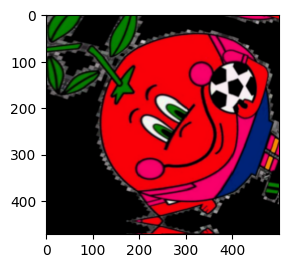

In [44]:
transform=A.Compose([A.CLAHE(),
                    A.RandomRotate90(),
                    A.Transpose(),
                    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
                    A.Blur(),
                    A.OpticalDistortion(),
                    A.GridDistortion(),
                    A.HueSaturationValue()])
augmented_image=transform(image=image)['image']
visualize(augmented_image)

## Flip

albumentations.augmentations.transforms.Flip(always_apply=False, p=0.5)<br>

∙Flip the input either horizontally, vertically or both horizontally and vertically.<br>

∙Parameters:	<br>
-p (float) – probability of applying the transform. <br>Default: 0.5.<br>

∙apply(img, d=0, **params)<br>
Args: d (int): code that specifies how to flip the input. <br> 0 for vertical flipping, <br> 1 for horizontal flipping,<br>
-1 for both vertical and horizontal flipping (which is also could be seen as rotating the input by 180 degrees).

## OneOf

Apply one of them <br>

## GaussNoise

albumentations.augmentations.transforms.GaussNoise(var_limit=(10, 50), always_apply=False, p=0.5)<br>

∙Apply gaussian noise to the input image.<br>

Parameters:	<br>
-var_limit ((int, int) or int) – variance range for noise. If var_limit is a single int, the range will be (-var_limit, var_limit). <br>Default: (10, 50).<br>

-p (float) – probability of applying the transform. Default: 0.5.

## MotionBlur

albumentations.augmentations.transforms.MotionBlur(blur_limit=7, always_apply=False, p=0.5)<br>

∙Apply motion blur to the input image using a random-sized kernel.

Parameters:	<br>
-blur_limit (int) – maximum kernel size for blurring the input image. <br>Default: 7.<br>-p (float) – probability of applying the transform. Default: 0.5.

## MedianBlur

albumentations.augmentations.transforms.MedianBlur(blur_limit=7, always_apply=False, p=0.5)<br>

∙Blur the input image using a median filter with a random aperture linear size.<br>

Parameters:	<br>
-blur_limit (int) – maximum aperture linear size for blurring the input image. <br>Default: 7.<br>
-p (float) – probability of applying the transform. Default: 0.5.

## PiecewiseAffine

albumentations.augmentations.geometric.transforms.PiecewiseAffine (scale=(0.03, 0.05), nb_rows=4, nb_cols=4, interpolation=1, mask_interpolation=0, cval=0, cval_mask=0, mode='constant', absolute_scale=False, always_apply=False, keypoints_threshold=0.01, p=0.5)<br>

Apply affine transformations that differ between local neighbourhoods. This augmentation places a regular grid of points on an image and randomly moves the neighbourhood of these point around via affine transformations. This leads to local distortions.<br>

## Emboss

albumentations.augmentations.transforms.Emboss (alpha=(0.2, 0.5), strength=(0.2, 0.7), always_apply=False, p=0.5)<br>

Emboss the input image and overlays the result with the original image.

## RandomBrightnessContrast

albumentations.augmentations.transforms.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, always_apply=False, p=0.5)<br>

Randomly change brightness and contrast of the input image.<br>

Parameters:	<br>
-brightness_limit ((float, float) or float) – factor range for changing brightness. If limit is a single float, the range will be (-limit, limit). Default: 0.2.<br>
-contrast_limit ((float, float) or float) – factor range for changing contrast. If limit is a single float, the range will be (-limit, limit). Default: 0.2.<br>
-p (float) – probability of applying the transform. Default: 0.5.

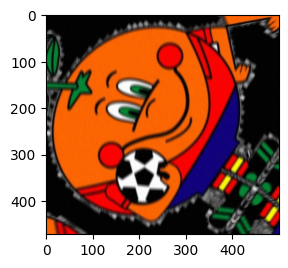

In [49]:
transform=A.Compose([
    A.RandomRotate90(),
    A.Flip(),
    A.Transpose(),
    A.GaussNoise(),
    
    A.OneOf([
        A.MotionBlur(p=.2),
        A.MedianBlur(blur_limit=3, p=.1),
        A.Blur(blur_limit=3, p=.1),
        ],p=.2),
    
    A.ShiftScaleRotate(),
    
    A.OneOf([
        A.OpticalDistortion(p=0.3),
        A.GridDistortion(p=.1),
        A.PiecewiseAffine(p=.3),
    ],p=0.2),
    
    A.OneOf([
        A.CLAHE(clip_limit=2),
        A.Sharpen(),
        A.Emboss(),
        A.RandomBrightnessContrast(),
        ],p=.3),
        A.HueSaturationValue(p=.3),
    ])

augmented_image=transform(image=image)['image']
visualize(augmented_image)